<a href='https://ai.meng.duke.edu'> = <img align="left" style="padding-top:10px;" src=https://storage.googleapis.com/aipi_datasets/Duke-AIPI-Logo.png>

# COVID Data Analysis - Working with API Data

Data from COVID Tracking Project (https://covidtracking.com/api)

In [1]:
import requests
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

## Part 1: Get the data
Get data for the state of North Carolina from the [Covid Tracking Project API](https://covidtracking.com/data/api) and put it into a pandas dataframe called ***state_covid_data***. We will put our code in the function ***get_data()***

You can check out the requests package documentation at https://requests.readthedocs.io/en/master/user/quickstart/

NOTE: there is now a v2 of the Covid Tracking Project API.  We will be using v1 for this exercise, because it is simpler to work with.  The endpoint for the v1 API is: "https://api.covidtracking.com/v1/states/{STATE_NAME}/daily.json"

In [2]:
def get_data(state):
    '''
    Gets data from the Covid Tracking Project API for a given state

    Inputs:
        state(str): state abbreviation

    Returns:
        state_covid_data(DataFrame): dataframe containing covid data for each day of the tracking period from the API
    '''

    
    ### BEGIN SOLUTION ###

    # Set endpoint (format described on https://covidtracking.com/api)
    endpoint = "https://api.covidtracking.com/v1/states/{}/daily.json".format(state)

    # Make API request using requests
    response = requests.get(url=endpoint, headers={}, params={})

    # Decode JSON response
    response = response.json()
    
    # Convert response to pandas dataframe
    state_covid_data = pd.DataFrame.from_dict(response)

    return state_covid_data

    ### END SOLUTION

In [3]:
state = "nc"
state_covid_data = get_data(state)
state_covid_data.head()

,date,state,positive,probableCases,negative,pending,totalTestResultsSource,totalTestResults,hospitalizedCurrently,hospitalizedCumulative,...,dataQualityGrade,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
0,20210307,NC,872176,112559.0,None,NaN,totalTestsViral,9688838.0,1179.0,None,...,None,0,0,d9ca67dd72ba6f8a8506ebb734fd25b0b8067608,0,0,0,0,0,
1,20210306,NC,872176,112559.0,None,NaN,totalTestsViral,9688838.0,1179.0,None,...,None,56,0,83cf01f626a4f35bd6237b6d93e3f6f424c885af,0,0,0,0,0,
2,20210305,NC,870149,112034.0,None,NaN,totalTestsViral,9650184.0,1226.0,None,...,None,47,0,b157a3fac47530dbec303f1abb8811fdf809b2c0,0,0,0,0,0,
3,20210304,NC,868056,111547.0,None,NaN,totalTestsViral,9605697.0,1290.0,None,...,None,36,0,b0e0b0510f722eb05aa86e35d1a4b736d9b2f80b,0,0,0,0,0,
4,20210303,NC,865554,110944.0,None,NaN,totalTestsViral,9561647.0,1303.0,None,...,None,75,0,ed7883b95bc3197feaa256f83f1cd4090f854fcf,0,0,0,0,0,


## Part 2: Clean up and plot the data
Complete the below function `clean_data()` which leans up the dataframe as follows:  
- Convert the 'date' column to pandas datetime
- Set the dataframe index to the 'date'

The function should then plot the daily number of new cases ('positiveIncrease') over time as a line chart.  It should return a dataframe of the cleaned up results.

In [4]:
def clean_data(df):
    '''
    Cleans the raw covid data from the api and plots line chart of new cases

    Inputs:
        df(DataFrame): dataframe of raw data from the api, one row per day

    Returns:
        df_clean(DataFrame): dataframe of covid data with index set to date
    '''
    ### BEGIN SOLUTION ###

    # Convert date to datetime
    df_clean = df.copy()
    df_clean.date = pd.to_datetime(df_clean.date, format="%Y%m%d")

    # Set the index to be the date
    df_clean.set_index(keys="date",inplace=True)

    # Plot the new cases over time
    plt.figure(figsize=(10,5))
    plt.plot(df_clean['positiveIncrease'])
    plt.title('New Cases')
    plt.show()

    return df_clean
    ### END SOLUTION ###

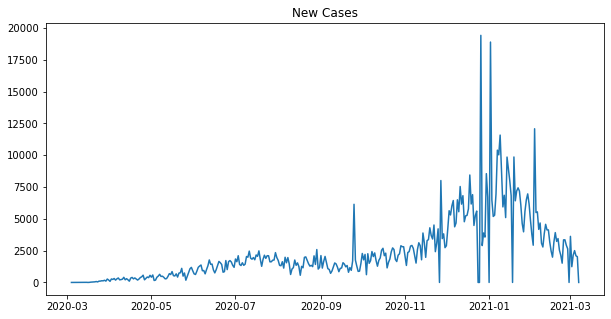

In [5]:
# Run function to display chart
df_clean = clean_data(state_covid_data)

## Part 3: Compare multiple states

Complete the function below to use the API to get data for the states North Carolina (nc), New York (ny), and California (ca).  Your function should make use of your other function `get_data()`.  It should then plot the data for all three states on a set of 4 plots:  
1) Cumulative postive cases over time  
2) Cumulative deaths over time  
3) Number of current hospitalized patients  
4) Number of new cases. 

Your visualization should look something like the image below (charts do not have to be in grid layout).  Be sure to include a legend on your charts in order to identify which line corresponds to which state.

<img align="left" style="padding-top:10px;" src="covid_data_plot.png">

In [6]:
def generate_plots(states):
    '''
    Gets covid data from the API and generates plots of cases, deaths, hospitalizations and cumulative cases over time

    Inputs:
        states(list): list of state abbreviations to include

    Returns:
        data(dict): dictionary with the states as keys and the values being cleaned DataFrames containing the covid data for the corresponding state
    '''
    ### BEGIN SOLUTION ###
    data = {}

    for state in states:
        # Get the data
        data[state] = get_data(state)
        # Convert date to datetime
        data[state].date = pd.to_datetime(data[state].date, format="%Y%m%d")
        # Set the index to be the date
        data[state].set_index(keys="date",inplace=True)

    # Create plots of data over time
    date_fmt = mdates.DateFormatter("%y-%m-%d")

    fig, ax = plt.subplots(2, 2, figsize=(15,10))
    for state in states:
        ax[0,0].plot(data[state][['positiveIncrease']])
        ax[0,0].set_title('New Cases')
        ax[0,0].xaxis.set_major_formatter(date_fmt)
        ax[0,0].legend([state for state in states])
        ax[0,1].plot(data[state][['positive']])
        ax[0,1].set_title('Cumulative Postive Cases')
        ax[0,1].xaxis.set_major_formatter(date_fmt)
        ax[0,1].legend([state for state in states])
        ax[1,1].plot(data[state][['death']])
        ax[1,1].set_title('Cumulative Deaths')
        ax[1,1].xaxis.set_major_formatter(date_fmt)
        ax[1,1].legend([state for state in states])
        ax[1,0].plot(data[state][['hospitalizedCurrently']])
        ax[1,0].set_title('Hospitalized')
        ax[1,0].xaxis.set_major_formatter(date_fmt)
        ax[1,0].legend([state for state in states])


    return data

    ### END SOLUTION ###

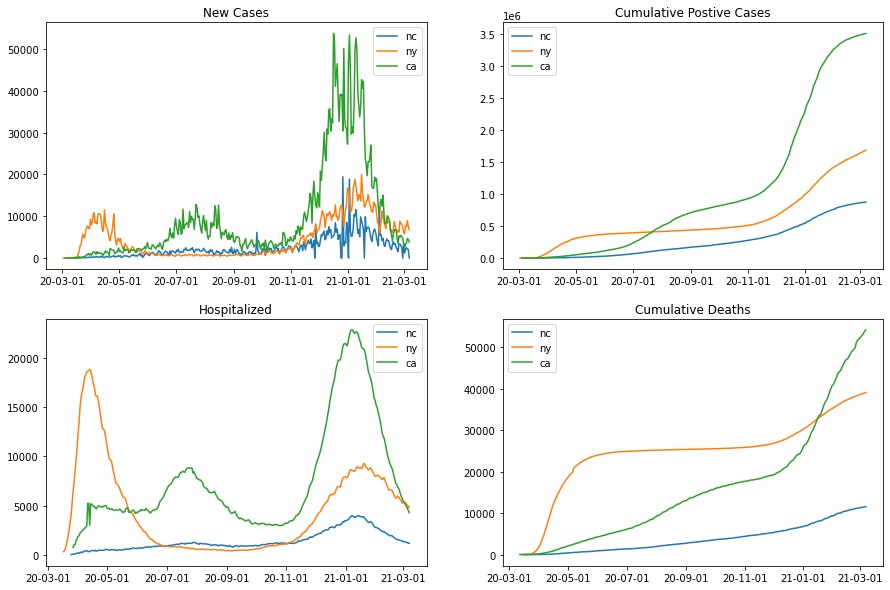

In [7]:
# Test function and display charts
states = ['nc','ny','ca']
data = generate_plots(states)

assert type(data) == dict
assert len(data.keys()) == len(states)
for state in states:
    assert state in data.keys()
assert type(data['nc']) == pd.DataFrame